# QUESTION 1

Distribution: Uniform (0, 1)
Sample Size (n): 10000
Computed Mean: 0.4965, Theoretical Mean: 0.4952
Computed Variance: 0.0839, Theoretical Variance: 0.0837
Computed Skewness: 0.0111, Theoretical Skewness: 0.0158
Computed Kurtosis: -1.2024, Theoretical Kurtosis: -1.1969


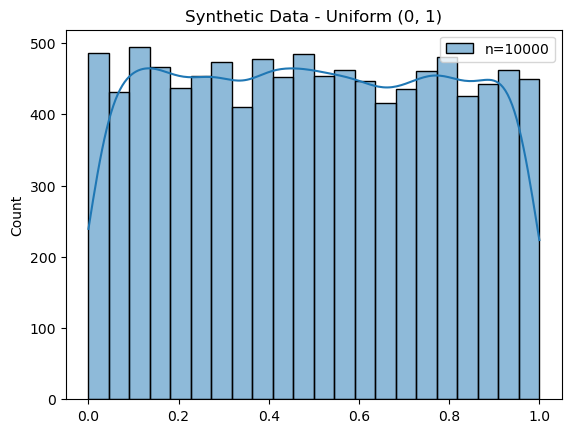

Distribution: Uniform (0, 1)
Sample Size (n): 50000
Computed Mean: 0.5009, Theoretical Mean: 0.5019
Computed Variance: 0.0834, Theoretical Variance: 0.0829
Computed Skewness: -0.0003, Theoretical Skewness: 0.0040
Computed Kurtosis: -1.2056, Theoretical Kurtosis: -1.2015


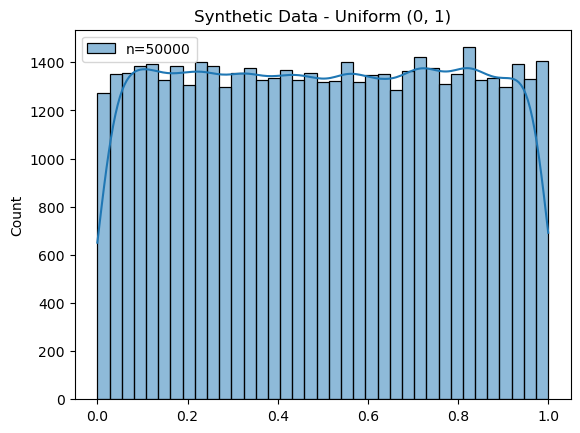

Distribution: Exponential (mean=1)
Sample Size (n): 10000
Computed Mean: 0.9855, Theoretical Mean: 0.9935
Computed Variance: 0.9810, Theoretical Variance: 1.0216
Computed Skewness: 2.0116, Theoretical Skewness: 1.9112
Computed Kurtosis: 5.9883, Theoretical Kurtosis: 5.0641


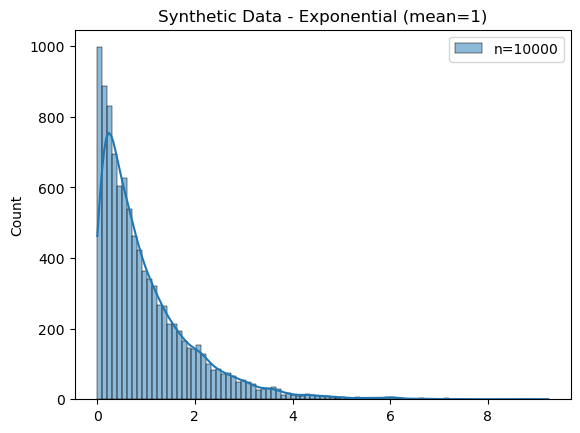

Distribution: Exponential (mean=1)
Sample Size (n): 50000
Computed Mean: 0.9965, Theoretical Mean: 1.0013
Computed Variance: 0.9963, Theoretical Variance: 0.9968
Computed Skewness: 2.0037, Theoretical Skewness: 1.9919
Computed Kurtosis: 5.8571, Theoretical Kurtosis: 5.5786


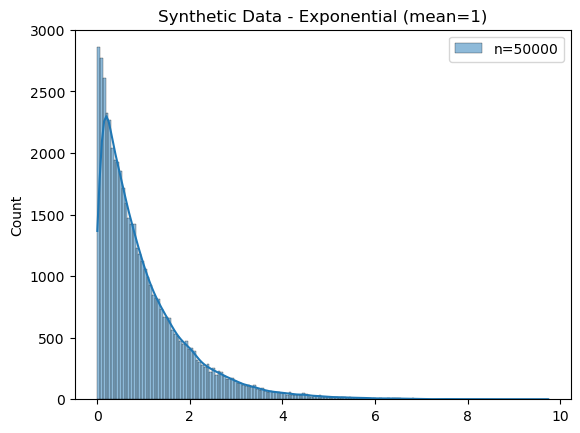

Distribution: Normal (mean=1, std=1)
Sample Size (n): 10000
Computed Mean: 0.9840, Theoretical Mean: 1.0011
Computed Variance: 1.0077, Theoretical Variance: 1.0046
Computed Skewness: -0.0239, Theoretical Skewness: 0.0259
Computed Kurtosis: 0.0135, Theoretical Kurtosis: -0.0202


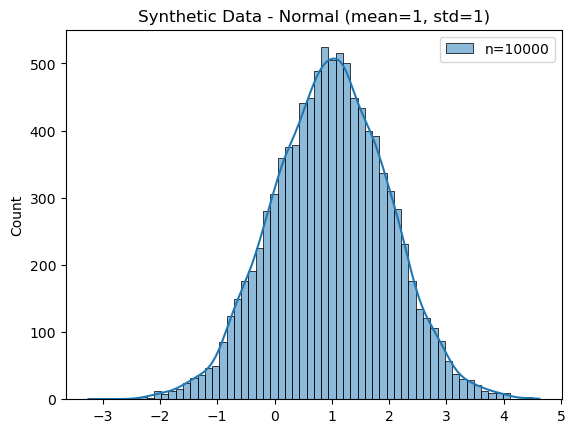

Distribution: Normal (mean=1, std=1)
Sample Size (n): 50000
Computed Mean: 1.0060, Theoretical Mean: 1.0014
Computed Variance: 1.0048, Theoretical Variance: 1.0045
Computed Skewness: 0.0217, Theoretical Skewness: 0.0029
Computed Kurtosis: 0.0110, Theoretical Kurtosis: -0.0148


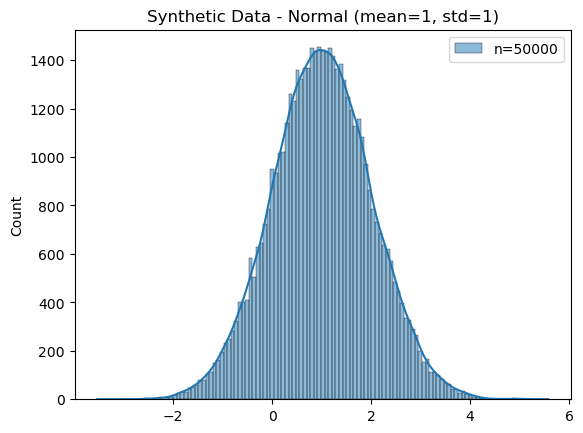

In [2]:
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Sample sizes
sample_sizes = [10000, 50000]

# Distributions
distributions = [
    {"name": "Uniform (0, 1)", "dist": np.random.uniform, "params": (0, 1)},
    {"name": "Exponential (mean=1)", "dist": np.random.exponential, "params": (1,)},
    {"name": "Normal (mean=1, std=1)", "dist": np.random.normal, "params": (1, 1)}
]

# Compute and plot for each distribution
for distribution in distributions:
    dist_name = distribution["name"]
    dist_function = distribution["dist"]
    dist_params = distribution["params"]

    for n in sample_sizes:
        # Generate synthetic data
        synthetic_data = dist_function(size=n, *dist_params)

        # Compute statistics
        mean = np.mean(synthetic_data)
        variance = np.var(synthetic_data)
        skewness = scipy.stats.skew(synthetic_data)
        kurtosis = scipy.stats.kurtosis(synthetic_data)

        # Theoretical values
        theoretical_mean = np.mean(dist_function(*dist_params, size=n))
        theoretical_variance = np.var(dist_function(*dist_params, size=n))
        theoretical_skewness = scipy.stats.skew(dist_function(*dist_params, size=n))
        theoretical_kurtosis = scipy.stats.kurtosis(dist_function(*dist_params, size=n))

        print(f"Distribution: {dist_name}")
        print(f"Sample Size (n): {n}")
        print(f"Computed Mean: {mean:.4f}, Theoretical Mean: {theoretical_mean:.4f}")
        print(f"Computed Variance: {variance:.4f}, Theoretical Variance: {theoretical_variance:.4f}")
        print(f"Computed Skewness: {skewness:.4f}, Theoretical Skewness: {theoretical_skewness:.4f}")
        print(f"Computed Kurtosis: {kurtosis:.4f}, Theoretical Kurtosis: {theoretical_kurtosis:.4f}")

        # Plot synthetic data
        sns.histplot(synthetic_data, kde=True, label=f'n={n}')
        plt.title(f'Synthetic Data - {dist_name}')
        plt.legend()
        plt.show()


# Question 2

In [56]:
import math

# Given values
lambda1 = 10  # Arrival rate for Terminal 1 passengers (customers/hour)
lambda2 = 20  # Arrival rate for Terminal 2 passengers (customers/hour)
mu1 = 30  # Service rate for Terminal 1 check-in (customers/hour)
muS = 37.5  # Service rate for Security-Check (customers/hour)
utilization_security = 0.8  # Utilization for Security-Check
average_service_time_Terminal1 = 2.0  # Average service time at Terminal 1 check-in (minutes)
average_service_time_Security = 1.6  # Average service time at Security-Check (minutes)

# 1. Average service time at Security-Check (W_Security)
lambda_total = lambda1 + lambda2

# Calculate the service rate (mu) using utilization formula
mu = lambda_total / utilization_security

# Calculate the average service time at the Security-Check

# 2. Performance metrics for Terminal 1 Check-in
rho_Terminal1 = lambda1 / mu1
L_Terminal1 = rho_Terminal1 / (1 - rho_Terminal1)
W_Terminal1 = L_Terminal1 / lambda1
Wq_Terminal1 = W_Terminal1 - 1 / mu1
LQ_Terminal1 = lambda1 * Wq_Terminal1

# 3. Performance metrics for Security-Check
L_Security =lambda_total / (muS - lambda_total)   # Utilization equals L for the M/M/1 queue
w_security = 1/ (muS - lambda_total)
rho_Security = utilization_security  # Utilization is the same as rho
Wq_Security = w_security - (1/muS)
LQ_Security = lambda_total * Wq_Security


# 4. Total average time spent by Terminal 1 passengers in the system
total_time_Terminal1 = W_Terminal1 + w_security * 60

# 5. Total average number of Terminal 1 passengers in the system

us = 20 / utilization_security
l2 = utilization_security * 20/ (us-20)
total_customers_Terminal1 = L_Terminal1 + (L_Security - l2) 
# 6. Average time spent by Terminal 2 passengers in the system
# Since Terminal 2 passengers join the Security-Check queue, their average time is W_Security, sO THEREFORE;
Avg_term2 = w_security


# Output the results
print("1. Average service time at Security-Check: {:.2f} minutes".format(W_Security))
print("2. Performance metrics for Terminal 1 Check-in:")
print("   - ρ: {:.4f}".format(rho_Terminal1))
print("   - L: {:.4f}".format(L_Terminal1))
print("   - LQ: {:.4f}".format(LQ_Terminal1))
print("   - W: {:.3f} minutes".format(W_Terminal1))
print("   - WQ: {:.3f} minutes".format(Wq_Terminal1))
print("3. Performance metrics for Security-Check:")
print("   - ρ: {:.4f}".format(rho_Security))
print("   - L: {:.4f}".format(L_Security))
print("   - LQ: {:.4f}".format(LQ_Security))
print("   - W: {:.2f} minutes".format(w_security))
print("   - WQ: {:.2f} minutes".format(Wq_Security))
print("4. Total average time spent by Terminal 1 passengers in the system: {:.2f} minutes".format(total_time_Terminal1))
print("5. Total average number of Terminal 1 passengers in the system: {:.4f}".format(total_customers_Terminal1))
print("6. Average time spent by Terminal 2 passengers in the system: {:.3f} minutes".format(Avg_term2))


1. Average service time at Security-Check: 1.60 minutes
2. Performance metrics for Terminal 1 Check-in:
   - ρ: 0.3333
   - L: 0.5000
   - LQ: 0.1667
   - W: 0.050 minutes
   - WQ: 0.017 minutes
3. Performance metrics for Security-Check:
   - ρ: 0.8000
   - L: 4.0000
   - LQ: 3.2000
   - W: 0.13 minutes
   - WQ: 0.11 minutes
4. Total average time spent by Terminal 1 passengers in the system: 8.05 minutes
5. Total average number of Terminal 1 passengers in the system: 1.3000
6. Average time spent by Terminal 2 passengers in the system: 0.133 minutes


# Question 3

# When Seed = 3456

SINGLE SERVER QUEUE SIMULATION - Security Check In System 
        MEAN INTERARRIVAL TIME                         0.0333
        MEAN SERVICE TIME                              0.02667
        STANDARD DEVIATION OF SERVICE TIMES            0.6
        NUMBER OF CUSTOMERS SERVED                     5000

        P                                              0.8
        MAXIMUM LINE LENGTH                            29.0
        Wq                                             0.13110534182051053  MINUTES
        L                                               3.972708616246615
        LQ                                              3.8156228455439996
        PROPORTION WHO SPEND FOUR
        W                                              0.0
        SIMULATION RUNLENGTH                           165.00749801325458 MINUTES
        NUMBER OF DEPARTURES                           5000
        
        
# When Seed = 4125

SINGLE SERVER QUEUE SIMULATION - Security Check In System 
        MEAN INTERARRIVAL TIME                         0.0333
        MEAN SERVICE TIME                              0.02667
        STANDARD DEVIATION OF SERVICE TIMES            0.6
        NUMBER OF CUSTOMERS SERVED                     5000

        P                                              0.8
        MAXIMUM LINE LENGTH                            26.0
        W                                             0.13146791461182067  MINUTES
        L                                               4.0010827906874145
        LQ                                              3.8499191839621214
        PROPORTION WHO SPEND FOUR
        Wq                                              0.0
        SIMULATION RUNLENGTH                           164.2904202305116 MINUTES
        NUMBER OF DEPARTURES                           5000

# When Seed = 4321

SINGLE SERVER QUEUE SIMULATION - Security Check In System 

        MEAN INTERARRIVAL TIME                         0.0333
        MEAN SERVICE TIME                              0.02667
        STANDARD DEVIATION OF SERVICE TIMES            0.6
        NUMBER OF CUSTOMERS SERVED                     5000
        P                                              0.8
        MAXIMUM LINE LENGTH                            23.0
        W                                              0.1425959191861246  MINUTES
        L                                               4.296501968591347
        LQ                                              4.14812277636447
        PROPORTION WHO SPEND FOUR
        Wq                                              0.0
        SIMULATION RUNLENGTH                           165.94420324782973 MINUTES
        NUMBER OF DEPARTURES                           5000

# Queston 4

1. Two M/M/1 Queues with Arrival Rate λ and Service Rate µ: In this system, you have two independent M/M/1 queues, each with its    own server, and each having an arrival rate of λ and a service rate of µ.

2. M/M/2 Queue with Arrival Rate 2λ and Service Rate µ for Each Server: In this system, you have a single M/M/2 queue with two      servers, both having the same service rate µ, and the overall arrival rate is 2λ.


<u>For Two M/M/1 Queues</u>

* ρ = λ/µ
* L = λ / (µ - λ) or λW
* W = 1 / (µ - λ) or l/λ
* Wq = W - 1/µ
* LQ = λWq or λ^2/ µ(µ - λ)


<u>For M/M/2 Queue</u>

* ρ = 2λ/sµ
* L = (2λ)Wq
* W = L/2λ
* Wq = LQ/2λ
* LQ = (P of no customers x P^ s + 1) / (s-1)!(s-p)^2

Lets take an example;  
* Arrival rate (λ) = 3 customers per hour  
* Service rate (µ) = 5 customers per hour
* Number of servers = s

<u>For the M/M/1 queues (two of them)</u>
* Utilization (ρ): ρ = λ / µ = 3 / 5 = 0.6
* Average Number of Customers in the System (L): L = λ / (µ - λ) = 3 / (5 - 3) = 1.5 customers
* Average Time a Customer Spends in the System (W): W = 1 / (µ - λ) = 1 / (5 - 3) = 0.5 minutes
* Average Time a Customer Spends Waiting in the Queue (WQ): 0.5 - 1 / 5 = 0.3 minutes
* Average Number of Customers in the Queue (LQ)= 3 * 0.3 = 0.9 customers

<u>For the M/M/2 queues</u>
* Queing intensity (ρ): ρ = 2λ / µ = 2 * 3 / 5 = 1.2
* queing utilization = 60%
* Average Number of Customers in the System (L): 1.875  
* Average Time a Customer Spends in the System (W): 0.313  
* Average Time a Customer Spends Waiting in the Queue (WQ): 0.113  
* Average Number of Customers in the Queue (LQ): 0.675  

Since the average waiting time of custumers in the system and queue was lower for the M/M/2 queues when compared to the M/M/1 queues.  

So the M/M/2 queues did better

# Question 5

Assumptions and Approximations:

We will assume that the arrival rate of customers follows a Poisson distribution, and the service times follow an exponential distribution.  
The service discipline is First-in-First-out (FIFO).  
The system can accommodate a maximum of 4 washing stalls (c = 4).  
There is room for only 3 cars to wait in the parking lot (N = 3).  

Arrival rate= 34 cars per hour.

<u>Percentage of customers choosing each option</u>

* Rinse only: 20%
* Wash and rinse: 70%
* Wash, rinse, and wax: 10%

<u>Service times for each option</u>
* Rinse only: 3 minutes
* Wash and rinse: 7 minutes
* Wash, rinse, and wax: 12 minutes

<u>Service rates (μ) for each option</u>
* Rinse Only: Service rate (μ) = 1 / 3 cars/minute (since it takes 3 minutes per car)
* Wash and Rinse: Service rate (μ) = 1 / 7 cars/minute
* Wash, Rinse, and Wax: Service rate (μ) = 1 / 12 cars/minute

<u>Utilization (ρ) for each service option</u>
* Rinse only: λ / (c * μ_rinse) = (34/60) / (4 * (20/3)) ≈ 0.158.
* Wash and rinse: λ / (c * μ_wash_rinse) = (34/60) / (4 * (1/7)) ≈ 0.170.
* Wash, rinse, and wax: λ / (c * μ_wash_rinse_wax) = (34/60) / (4 * (1/12)) ≈ 0.212.

ρ_total = ρ_rinse + ρ_wash_rinse + ρ_wash_rinse_wax  
ρ_total = 0.158 + 0.170 + 0.21  
ρ_total ≈ 0.538  


Now, let's calculate the utilization of the 4 stalls (c = 4):

Utilization (U) = ρ_total / c  
U = 0.538 / 4  
U = 0.1345  

Now, let's calculate the utilization of the 4 stalls (c = 5):  
U_new = 0.538 / 5  
U_new ≈ 0.1076  

Using erland b's formula B(c,ρ) to calculate th eprobabilty of customer loss in the currecnt system  
when B(4,0.1345) the p_loss = 0.18886  
when B(5,0.1076) the p_loss = 0.0721  

When we compare the p_loss above,we will see that;  
In the current system (four stalls), approximately 18.86% of customers are lost. While,  
In the proposed system (five stalls), approximately 7.21% of customers are lost.  


So therefore adding an additional stall in the proposed system reduces the rate at which customers are lost, making it a better option for accommodating more business

# Question 6

In [26]:
# Parameters
arrival_rate = 1  # Patients per hour
service_rate = 4  # Patients per hour
num_stages = 3
mean_service_time = 60 / service_rate  # 15 minutes per stage in minutes

# Mean and Variance of Total Examination Time
mean_total_examination_time = num_stages * mean_service_time
variance_total_examination_time = num_stages * (mean_service_time ** 2)

# Average Number of Delayed Patients (LQ)
lq = arrival_rate * ((arrival_rate / service_rate) / (1 - arrival_rate / service_rate))

# Total Mean Time a Customer Spends in the System (W)
total_customers_in_system = num_stages + lq
total_time_in_system = total_customers_in_system / arrival_rate * 60  # Convert to minutes

# Print the results
print("Mean Total Examination Time: {:.2f} minutes".format(mean_total_examination_time))
print("Variance of Total Examination Time: {:.2f} minutes^2".format(variance_total_examination_time))
print("Average Number of Delayed Patients (LQ): {:.2f} patients".format(lq))
print("Total Mean Time a Customer Spends in the System (W): {:.2f} minutes".format(total_time_in_system))


Mean Total Examination Time: 45.00 minutes
Variance of Total Examination Time: 675.00 minutes^2
Average Number of Delayed Patients (LQ): 0.33 patients
Total Mean Time a Customer Spends in the System (W): 200.00 minutes


The total examination time is not exponentially distributed because it's the sum of three independent exponential random variables. The sum of exponential random variables does not follow an exponential distribution. Instead, it follows a gamma distribution. In this case, a gamma distribution with shape parameter (k) of 3 (due to three stages) and scale 

# Question 7

1. Mean (Expectation) of Y:  
    The expectation (mean) of a sum of random variables is equal to the sum of their individual expectations. So, using the 
    linearity of expectation: 

    E[y] = E[x<sub>1</sub> + x<sub>2</sub> + x<sub>3</sub> + .... x<sub>n</sub> ]

    E[x<sub>1</sub>] + E[x<sub>2</sub>] .... E[x<sub>n</sub>]

    since all E[x<sub>1</sub>], ..... have the same mean n, then E[Y] = n * n
      
     
2. Variance of Y:  
    The variance of a sum of independent random variables is equal to the sum of their individual variances. Using the property 
    Var(X + Y) = Var(X) + Var(Y) for independent random variables:
    
    Var(Y) = Var(x<sub>1</sub> + x<sub>2</sub> + x<sub>3</sub> + .... x<sub>n</sub> )
    Since all x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub> have the same variance σ^2, we can rewrite this as:  
    Var(Y) = Var(x<sub>1</sub>) + Var(x<sub>2</sub>) .... Var(x<sub>n</sub>)  
    Using the property Var(aX) = a² * Var(X), where 'a' is a constant, we can simplify further:  
    Var(Y) = a² + a² + .... a²(n times)  
    Var(Y) = n * σ²
    
Therefore, the mean of Y is n times the mean of each X<sub>i</sub> (η), and the variance of Y is n times the variance of each X<sub>i</sub> (σ<sup>2</sup>).